In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from sklearn.metrics import confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import itertools
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np
import pickle
import cv2
import random as rn
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from tensorflow.keras.layers import Input,Dropout,BatchNormalization,Activation,Add
from tensorflow.keras.preprocessing import image
#from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation, Flatten, Dropout, Dense
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
#from keras.optimizers import Adam
from keras.preprocessing import image
#from keras.preprocessing.image import img_to_array
from tensorflow.keras.utils import img_to_array

from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.applications import densenet
from tensorflow.keras.optimizers import Adam

In [3]:
from tensorflow.keras.utils import img_to_array


In [4]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from numpy.random import seed

In [5]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import skimage.io
import skimage.transform
import skimage.filters
import keras
from keras.applications import vgg16
from keras import backend as K

In [10]:
EPOCHS = 25
INIT_LR = 1e-3
BS = 32
#default_image_size = tuple((28, 28))
default_image_size = tuple((128, 128))

image_size = 0
directory_root ="C:/Users/Admin/Documents/124156079/Grape/Grape/"
#directory_root = r'/content/drive/MyDrive/SKIN'

width=224
height=224
depth=3

In [7]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [11]:
image_list, label_list = [], []
try:
    print("[INFO] Loading images ...")
    root_dir = listdir(directory_root)
    for directory in root_dir :
        # remove .DS_Store from list
        if directory == ".DS_Store" :
            root_dir.remove(directory)

    for plant_folder in root_dir :
        plant_disease_folder_list = listdir(f"{directory_root}/{plant_folder}")
        

        for plant_disease_folder in plant_disease_folder_list:
            print(f"[INFO] Processing {plant_disease_folder} ...")
           
            plant_disease_image_list = listdir(f"{directory_root}/{plant_folder}/{plant_disease_folder}/")
            print(plant_disease_folder)
            i=len(plant_disease_image_list)
            print (i)
            for image in plant_disease_image_list[:10000]:
                image_directory = f"{directory_root}/{plant_folder}/{plant_disease_folder}/{image}"
                if image_directory.endswith(".jpg") == True or image_directory.endswith(".JPG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder)
                elif image_directory.endswith(".png") == True or image_directory.endswith(".PNG") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder) 
                elif image_directory.endswith(".jfif") == True or image_directory.endswith(".JFIF") == True:
                    image_list.append(convert_image_to_array(image_directory))
                    label_list.append(plant_disease_folder) 
    print("[INFO] Image loading completed")  
except Exception as e:
    print(f"Error : {e}")

[INFO] Loading images ...
[INFO] Processing Grape___Black_rot ...
Grape___Black_rot
500
[INFO] Processing Grape___Esca_(Black_Measles) ...
Grape___Esca_(Black_Measles)
518
[INFO] Processing Grape___healthy ...
Grape___healthy
423
[INFO] Processing Grape___Leaf_blight_(Isariopsis_Leaf_Spot) ...
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)
527
[INFO] Image loading completed


In [12]:
image_size = len(image_list)
print(image_size)
label_binarizer = LabelBinarizer()
image_labels = label_binarizer.fit_transform(label_list)
#print(image_labels)
pickle.dump(label_binarizer,open('label_densenet.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

np_image_list = np.array(image_list, dtype=np.float32) / 225.0

print("[INFO] Spliting data to train, test")
x_train, x_test, y_train, y_test = train_test_split(np_image_list, image_labels, 
                                                    test_size=0.2, random_state = 42,shuffle=True)
                                                    
  
print(x_train.shape,x_test.shape)
#print(image_labels)
#print(y_train,y_test)
aug = ImageDataGenerator(
    rotation_range=25, width_shift_range=0.1,
    height_shift_range=0.1, shear_range=0.2,  
    horizontal_flip=True, 
    fill_mode="nearest",
    #zoom_range=0.2,
    #featurewise_center=True,
    #samplewise_center=False,
    #featurewise_std_normalization=True,
    #samplewise_std_normalization=False,
    #zca_whitening=True,
    #zca_epsilon=1e-06,
    #brightness_range=[0.5,1.5],
    #channel_shift_range=0.15,
    #fill_mode="nearest",
    #cval=0.0,
    #horizontal_flip=False,
    vertical_flip=True,
    #preprocessing_function=AHE
    )

1968
[INFO] Spliting data to train, test
(1574, 128, 128, 3) (394, 128, 128, 3)


In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from keras.layers.core import Dense, Flatten
from tensorflow.keras.layers import Flatten, Activation
from tensorflow.keras.utils import to_categorical
import warnings
from sklearn.metrics import classification_report,confusion_matrix
warnings.filterwarnings("ignore")
import tensorflow.keras.backend as K
K.clear_session()

In [14]:
input_shape=(128,128,3)

In [15]:
y_train.shape

(1574, 4)

In [67]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu,
                           input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(4,  activation=tf.nn.softmax)
])
# Adam is the best among the adaptive optimizers in most of the cases
model.compile(
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
loss = tf.keras.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_1 (Flatten)         (None, 32768)            

In [68]:
for layer in model.layers:
    # Check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # Get filter weights if the layer has weights
    if len(layer.weights) > 0:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)

conv2d_2 (3, 3, 3, 32)
conv2d_3 (3, 3, 32, 32)


In [17]:
model.compile(
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
loss = tf.keras.losses.CategoricalCrossentropy(),
metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 flatten (Flatten)           (None, 32768)             0

In [18]:
hist = model.fit(x_train, y_train,
                epochs=15,
                batch_size=256,
                validation_split=0.2)

Epoch 1/15
5/5 [==============================] - 13s 2s/step - loss: 1.3829 - accuracy: 0.3018 - val_loss: 1.2873 - val_accuracy: 0.4159
Epoch 2/15
5/5 [==============================] - 11s 2s/step - loss: 1.2721 - accuracy: 0.4726 - val_loss: 1.1484 - val_accuracy: 0.5778
Epoch 3/15
5/5 [==============================] - 10s 2s/step - loss: 1.1176 - accuracy: 0.5878 - val_loss: 0.9948 - val_accuracy: 0.6635
Epoch 4/15
5/5 [==============================] - 10s 2s/step - loss: 0.9784 - accuracy: 0.6394 - val_loss: 0.8903 - val_accuracy: 0.6889
Epoch 5/15
5/5 [==============================] - 10s 2s/step - loss: 0.8746 - accuracy: 0.6751 - val_loss: 0.7903 - val_accuracy: 0.7810
Epoch 6/15
5/5 [==============================] - 10s 2s/step - loss: 0.7925 - accuracy: 0.7339 - val_loss: 0.7221 - val_accuracy: 0.7746
Epoch 7/15
5/5 [==============================] - 9s 2s/step - loss: 0.7357 - accuracy: 0.7260 - val_loss: 0.6617 - val_accuracy: 0.7810
Epoch 8/15
5/5 [===================

In [19]:
model.evaluate(x_test,y_test)

13/13 [==============================] - 1s 44ms/step - loss: 0.4686 - accuracy: 0.8426


[0.46859732270240784, 0.8426395654678345]

In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

import os

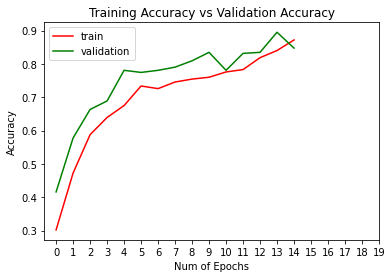

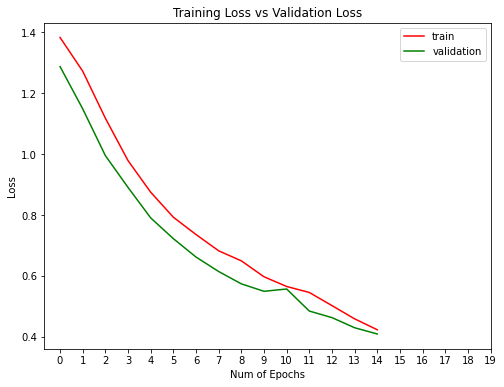

In [21]:
from sklearn.metrics import mean_squared_error
plt.figure(0)
plt.plot(hist.history['accuracy'],'r')
plt.plot(hist.history['val_accuracy'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(hist.history['loss'],'r')
plt.plot(hist.history['val_loss'],'g')
plt.xticks(np.arange(0, 20, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])



In [22]:
import seaborn as sns
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import pickle
import csv

from sklearn.metrics import confusion_matrix, classification_report
import tensorflow as tf
from PIL import Image

import os

In [171]:
# from sklearn.datasets import load_digits
# from sklearn.model_selection import train_test_split as tts
# from sklearn.linear_model import LogisticRegression


13/13 [==============================] - 1s 47ms/step


Text(0.5, 144.41374999999996, 'Predicted')

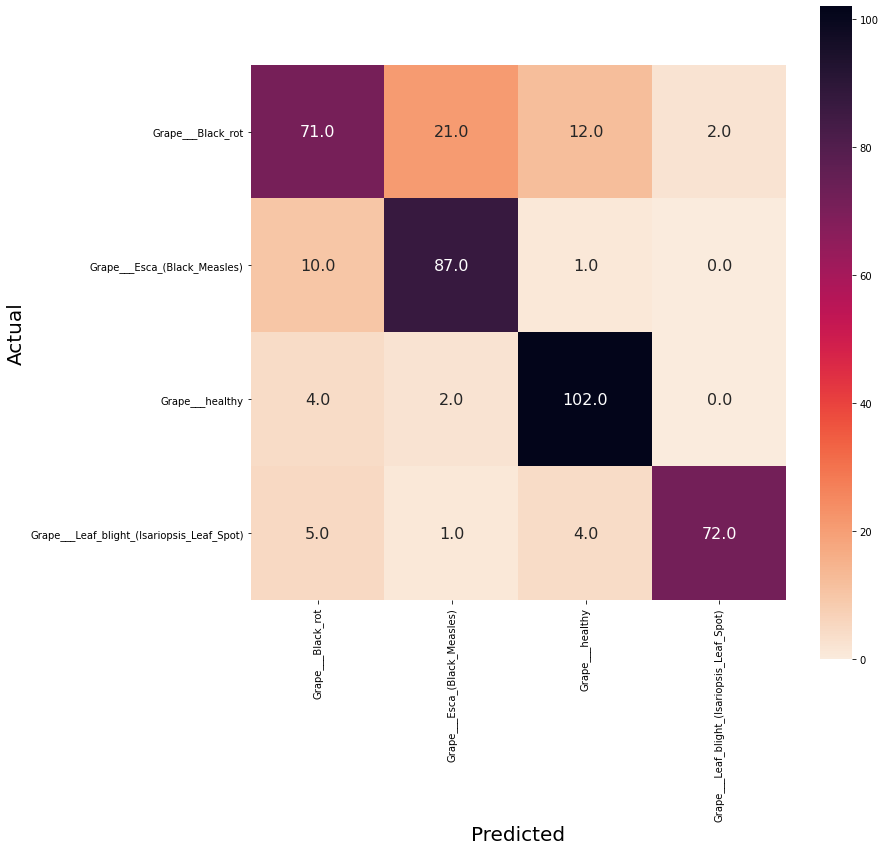

In [23]:
label = ['Grape___Black_rot', 'Grape___Esca_(Black_Measles)','Grape___healthy','Grape___Leaf_blight_(Isariopsis_Leaf_Spot)']
Ypred = model.predict(x_test)

Ypred = np.argmax(Ypred, axis=1)
Ytrue = np.argmax(y_test, axis=1)

cm = confusion_matrix(Ytrue, Ypred)
plt.figure(figsize=(12, 12))
ax = sns.heatmap(cm, cmap="rocket_r", fmt=".01f",annot_kws={'size':16}, annot=True, square=True, xticklabels=label, yticklabels=label)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predicted', fontsize=20)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(Ytrue, Ypred))

              precision    recall  f1-score   support

           0       0.79      0.67      0.72       106
           1       0.78      0.89      0.83        98
           2       0.86      0.94      0.90       108
           3       0.97      0.88      0.92        82

    accuracy                           0.84       394
   macro avg       0.85      0.85      0.84       394
weighted avg       0.84      0.84      0.84       394



# Visualizing inside CNN

In [72]:
model = tf.keras.Model(inputs=model.inputs , outputs=model.layers[1].output)

1/1 [==============================] - 0s 47ms/step


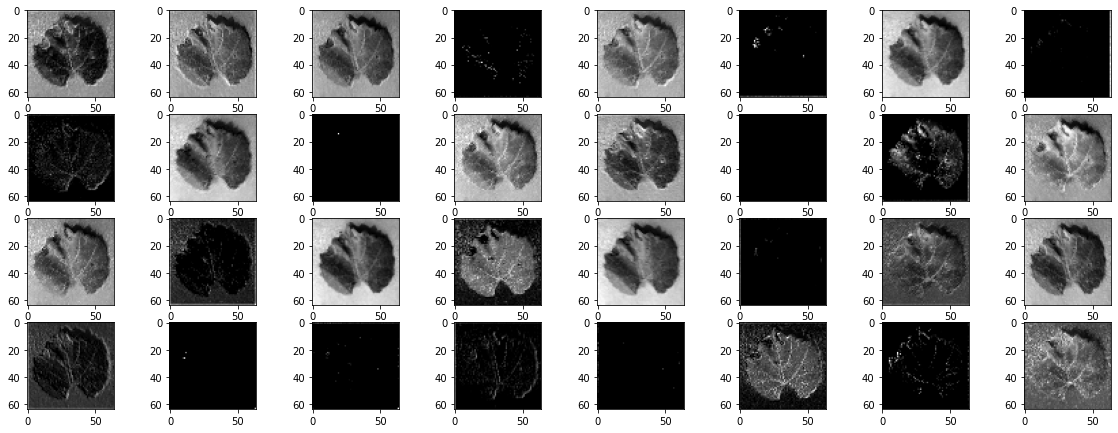

In [34]:
#calculating features_map
features = model.predict(image)

fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):

    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1] , cmap='gray')
    
pyplot.show()

In [29]:
 # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
from matplotlib import pyplot

import warnings
warnings.filterwarnings('ignore')

In [32]:
image = load_img('C:/Users/Admin/Documents/124156079/Grape/Grape/Grapes/Grape___Black_rot/858899f7-5627-4674-af30-8c4cc7fd5535___FAM_B.Rot 3340.JPG' , target_size=(128,128))

# convert the image to an array
image = img_to_array(image)
# expand dimensions so that it represents a single 'sample'
image = expand_dims(image, axis=0)

In [36]:
model.layers

In [45]:
x=[]
for layer in model.layers:
    x.append(layer.get_weights())

In [46]:
x

[[],
 [array([[[[-1.05049618e-01, -1.05379440e-01,  5.51306009e-02,
             8.50723609e-02, -1.11670926e-01,  7.03914613e-02,
            -6.37447760e-02,  1.36124447e-01, -1.81209818e-02,
            -1.04675427e-01, -5.28474897e-03,  7.85265118e-02,
             5.36645763e-02, -1.25558600e-01,  1.21820502e-01,
             6.75702095e-02,  1.25643596e-01, -6.66448623e-02,
             3.11472686e-03, -1.15417294e-01, -4.53318246e-02,
            -1.20647080e-01, -3.63405459e-02,  7.28595480e-02,
            -5.92747405e-02, -4.92023416e-02, -4.26369831e-02,
            -9.74738374e-02, -1.24559656e-01, -7.47628137e-02,
             1.14779681e-01,  3.08481455e-02],
           [-1.14919327e-01,  1.10164717e-01, -9.65383872e-02,
            -2.07141601e-02,  8.76439959e-02,  3.79161276e-02,
             1.29740005e-02,  5.49267279e-03,  3.10306884e-02,
             1.06112801e-01,  3.48159648e-03, -8.76690522e-02,
             2.00893842e-02,  5.31900562e-02, -1.28372356e-01,
   

In [59]:
model.layers[1].get_weights()[0]

array([[[[-1.05049618e-01, -1.05379440e-01,  5.51306009e-02,
           8.50723609e-02, -1.11670926e-01,  7.03914613e-02,
          -6.37447760e-02,  1.36124447e-01, -1.81209818e-02,
          -1.04675427e-01, -5.28474897e-03,  7.85265118e-02,
           5.36645763e-02, -1.25558600e-01,  1.21820502e-01,
           6.75702095e-02,  1.25643596e-01, -6.66448623e-02,
           3.11472686e-03, -1.15417294e-01, -4.53318246e-02,
          -1.20647080e-01, -3.63405459e-02,  7.28595480e-02,
          -5.92747405e-02, -4.92023416e-02, -4.26369831e-02,
          -9.74738374e-02, -1.24559656e-01, -7.47628137e-02,
           1.14779681e-01,  3.08481455e-02],
         [-1.14919327e-01,  1.10164717e-01, -9.65383872e-02,
          -2.07141601e-02,  8.76439959e-02,  3.79161276e-02,
           1.29740005e-02,  5.49267279e-03,  3.10306884e-02,
           1.06112801e-01,  3.48159648e-03, -8.76690522e-02,
           2.00893842e-02,  5.31900562e-02, -1.28372356e-01,
           1.13532059e-01, -8.13034922e-

In [73]:
for layer in model.layers:
    # Check for convolutional layer
    if 'conv' not in layer.name:
        continue
    # Get filter weights if the layer has weights
    if len(layer.weights) > 0:
        filters, biases = layer.get_weights()
        print(layer.name, filters.shape)


conv2d_2 (3, 3, 3, 32)
